<a href="https://colab.research.google.com/github/dikshank/Exploratory-data-analysis-on-GlassDoor-salary-data/blob/main/Glassdoor_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install selenium
# !apt-get update 
# !apt install chromium-chromedriver

# from selenium import webdriver
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [5]:
import pandas as pd

In [6]:
! pip install -q kaggle

     |████████████████████████████████| 127 kB 21.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.2 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
cd /content/drive/MyDrive/GlassDoor salary Prediction

In [ ]:
!kaggle datasets download -d rkb0023/glassdoor-data-science-jobs

In [ ]:
! unzip /content/drive/MyDrive/'GlassDoor salary Prediction/glassdoor-data-science-jobs.zip'

In [11]:
import pandas as pd

In [9]:
data = pd.read_csv('/content/drive/MyDrive/GlassDoor salary Prediction/glassdoor_jobs.csv')

In [10]:
data.shape

(1000, 14)

In [12]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ KB


# data cleaning

In [14]:
salary = data['Salary Estimate'].apply(lambda x:x.split('(')[0])

In [15]:
salary

0        $77K-$92K 
1        $77K-$92K 
2        $77K-$92K 
3        $77K-$92K 
4        $77K-$92K 
           ...     
995    $105K-$138K 
996    $105K-$138K 
997    $105K-$138K 
998    $105K-$138K 
999    $105K-$138K 
Name: Salary Estimate, Length: 1000, dtype: object

In [16]:
miuns_kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

In [17]:
miuns_kd

0        77-92 
1        77-92 
2        77-92 
3        77-92 
4        77-92 
         ...   
995    105-138 
996    105-138 
997    105-138 
998    105-138 
999    105-138 
Name: Salary Estimate, Length: 1000, dtype: object

In [18]:
data['hourly'] = data['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

In [19]:
data['hourly'].unique()

array([0, 1])

In [20]:
data['employer provider'] = data['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [21]:
data['employer provider'].unique()

array([0])

In [22]:
minus_hr = miuns_kd.apply(lambda x:x.lower().replace('per hour','').replace('employer provided salary:',''))

In [23]:
minus_hr

0        77-92 
1        77-92 
2        77-92 
3        77-92 
4        77-92 
         ...   
995    105-138 
996    105-138 
997    105-138 
998    105-138 
999    105-138 
Name: Salary Estimate, Length: 1000, dtype: object

In [24]:
data['min_salary'] = minus_hr.apply(lambda x: int(x.split('-')[0]))

In [25]:
data['min_salary']

0       77
1       77
2       77
3       77
4       77
      ... 
995    105
996    105
997    105
998    105
999    105
Name: min_salary, Length: 1000, dtype: int64

In [26]:
data['max_salary'] = minus_hr.apply(lambda x: int(x.split('-')[1]))

In [27]:
data['max_salary']

0       92
1       92
2       92
3       92
4       92
      ... 
995    138
996    138
997    138
998    138
999    138
Name: max_salary, Length: 1000, dtype: int64

In [28]:
data['avg_salary'] = (data.min_salary+data.max_salary)/2

In [29]:
data['avg_salary']

0       84.5
1       84.5
2       84.5
3       84.5
4       84.5
       ...  
995    121.5
996    121.5
997    121.5
998    121.5
999    121.5
Name: avg_salary, Length: 1000, dtype: float64

In [30]:
data['company_txt'] = data.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1)

In [31]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provider,min_salary,max_salary,avg_salary,company_txt
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,77,92,84.5,Affinity Solutions\n
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,0,0,77,92,84.5,ManTech\n
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer",0,0,77,92,84.5,Takeda\n
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen...",0,0,77,92,84.5,A Place for Mom\n
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1,0,0,77,92,84.5,GovTech\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Data Scientist,$105K-$138K (Glassdoor Est.),• Be one of the first to join our rapidly grow...,5.0,Shelf Engine\n5.0,"Seattle, WA","Seattle, WA",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,0,105,138,121.5,Shelf Engine\n
996,Analytic Consultant 4 - Branch Banking Reporti...,$105K-$138K (Glassdoor Est.),Job Description\n\nImportant Note: During the ...,3.6,Wells Fargo\n3.6,"Dallas, TX","San Francisco, CA",10000+ employees,1852,Company - Public,Banks & Building Societies,Finance,₹500+ billion (INR),-1,0,0,105,138,121.5,Wells Fargo\n
997,Data Scientist,$105K-$138K (Glassdoor Est.),"THE COMPANY\n\nFannie Mae provides reliable, l...",3.6,Fannie Mae\n3.6,"Washington, DC","Washington, DC",5001 to 10000 employees,1938,Company - Public,Investment Banking & Asset Management,Finance,₹500+ billion (INR),Freddie Mac,0,0,105,138,121.5,Fannie Mae\n
998,Data Scientist,$105K-$138K (Glassdoor Est.),Ready to write the best chapter of your career...,3.9,XSELL Technologies\n3.9,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,0,105,138,121.5,XSELL Technologies\n


In [32]:
data['job_state'] = data['Location'].apply(lambda x: x.split(',')[0])

In [33]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provider,min_salary,max_salary,avg_salary,company_txt,job_state
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,77,92,84.5,Affinity Solutions\n,New York
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,0,0,77,92,84.5,ManTech\n,Chantilly
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer",0,0,77,92,84.5,Takeda\n,Cambridge
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen...",0,0,77,92,84.5,A Place for Mom\n,Overland Park
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1,0,0,77,92,84.5,GovTech\n,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Data Scientist,$105K-$138K (Glassdoor Est.),• Be one of the first to join our rapidly grow...,5.0,Shelf Engine\n5.0,"Seattle, WA","Seattle, WA",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,0,105,138,121.5,Shelf Engine\n,Seattle
996,Analytic Consultant 4 - Branch Banking Reporti...,$105K-$138K (Glassdoor Est.),Job Description\n\nImportant Note: During the ...,3.6,Wells Fargo\n3.6,"Dallas, TX","San Francisco, CA",10000+ employees,1852,Company - Public,Banks & Building Societies,Finance,₹500+ billion (INR),-1,0,0,105,138,121.5,Wells Fargo\n,Dallas
997,Data Scientist,$105K-$138K (Glassdoor Est.),"THE COMPANY\n\nFannie Mae provides reliable, l...",3.6,Fannie Mae\n3.6,"Washington, DC","Washington, DC",5001 to 10000 employees,1938,Company - Public,Investment Banking & Asset Management,Finance,₹500+ billion (INR),Freddie Mac,0,0,105,138,121.5,Fannie Mae\n,Washington
998,Data Scientist,$105K-$138K (Glassdoor Est.),Ready to write the best chapter of your career...,3.9,XSELL Technologies\n3.9,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,0,105,138,121.5,XSELL Technologies\n,Chicago


In [34]:
data.job_state.value_counts()

San Francisco    64
New York         62
Cambridge        38
Seattle          31
Chicago          28
                 ..
Somerville        1
Scotts Valley     1
Red Bank          1
Chevy Chase       1
Dulles            1
Name: job_state, Length: 292, dtype: int64

In [35]:
data['same_state'] = data.apply(lambda x: 1 if x.Location == x.Headquarters else 0,axis=1)

In [36]:
data['same_state']

0      1
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    0
Name: same_state, Length: 1000, dtype: int64

In [37]:
data.Founded

0      1998
1      1968
2      1781
3      2000
4      2016
       ... 
995      -1
996    1852
997    1938
998    2014
999    1996
Name: Founded, Length: 1000, dtype: int64

In [38]:
data['age'] = data.Founded.apply(lambda x: x if x<1 else 2022-x)

In [39]:
data['age']

0       24
1       54
2      241
3       22
4        6
      ... 
995     -1
996    170
997     84
998      8
999     26
Name: age, Length: 1000, dtype: int64

In [40]:
data['Job Description'][0]

"Data Scientist\nAffinity Solutions / Marketing Cloud seeks smart, curious, technically savvy candidates to join our cutting-edge data science team. We hire the best and brightest and give them the opportunity to work on industry-leading technologies.\nThe data sciences team at AFS/Marketing Cloud build models, machine learning algorithms that power all our ad-tech/mar-tech products at scale, develop methodology and tools to precisely and effectively measure market campaign effects, and research in-house and public data sources for consumer spend behavior insights. In this role, you'll have the opportunity to come up with new ideas and solutions that will lead to improvement of our ability to target the right audience, derive insights and provide better measurement methodology for marketing campaigns. You'll access our core data asset and machine learning infrastructure to power your ideas.\nDuties and Responsibilities\n· Support all clients model building needs, including maintaining 

In [41]:
n = '''Data Scientist Affinity Solutions / Marketing Cloud seeks smart, curious, technically savvy candidates to join our cutting-edge data science team. We hire the best and brightest and give them the opportunity to work on industry-leading technologies. The data sciences team at AFS/Marketing Cloud build models, machine learning algorithms that power all our ad-tech/mar-tech products at scale, develop methodology and tools to precisely and effectively measure market campaign effects, and research in-house and public data sources for consumer spend behavior insights. In this role, you'll have the opportunity to come up with new ideas and solutions that will lead to improvement of our ability to target the right audience, derive insights and provide better measurement methodology for marketing campaigns. You'll access our core data asset and machine learning infrastructure to power your ideas.
Duties and Responsibilities
· Support all clients model building needs, including maintaining and improving current modeling/scoring methodology and processes,
· Provide innovative solutions to customized modeling/scoring/targeting with appropriate ML/statistical tools,
· Provide analytical/statistical support such as marketing test design, projection, campaign measurement, market insights to clients and stakeholders.
· Mine large consumer datasets in the cloud environment to support ad hoc business and statistical analysis,
· Develop and Improve automation capabilities to enable customized delivery of the analytical products to clients,
· Communicate the methodologies and the results to the management, clients and none technical stakeholders.
Basic Qualifications
· Advanced degree in Statistics/Mathematics/Computer Science/Economics or other fields that requires advanced training in data analytics.
· Being able to apply basic statistical/ML concepts and reasoning to address and solve business problems such as targeting, test design, KPI projection and performance measurement.
· Entrepreneurial, highly self-motivated, collaborative, keen attention to detail, willingness and capable learn quickly, and ability to effectively prioritize and execute tasks in a high pressure environment.
· Being flexible to accept different task assignments and able to work on a tight time schedule.
· Excellent command of one or more programming languages; preferably Python, SAS or R
· Familiar with one of the database technologies such as PostgreSQL, MySQL, can write basic SQL queries
· Great communication skills (verbal, written and presentation)
Preferred Qualifications
· Experience or exposure to large consumer and/or demographic data sets.
· Familiarity with data manipulation and cleaning routines and techniques.'''

In [42]:
n.find('r_studio')

-1

In [43]:
data['python_yn'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [44]:
data['python_yn'].value_counts()

1    662
0    338
Name: python_yn, dtype: int64

In [45]:
data['r_studio'] = data['Job Description'].apply(lambda x: 1 if 'r_studio' in x.lower() or 'r-studio' in x.lower() or 'r studio' in x.lower() else 0)

In [46]:
data['r_studio'].value_counts()

0    997
1      3
Name: r_studio, dtype: int64

In [47]:
data['spark'] = data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [48]:
data['spark'].value_counts()

0    762
1    238
Name: spark, dtype: int64

In [49]:
data['aws'] = data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [50]:
data['aws'].value_counts()

0    761
1    239
Name: aws, dtype: int64

In [51]:
data['excel'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [52]:
data['excel'].value_counts()

0    589
1    411
Name: excel, dtype: int64

In [53]:
data.shape

(1000, 28)

In [54]:
cd /content/drive/MyDrive/GlassDoor salary Prediction

/content/drive/MyDrive/GlassDoor salary Prediction


In [55]:
data.to_csv('cleaned_glassdoor salary data.csv',index=False)

In [56]:
df = pd.read_csv('/content/drive/MyDrive/GlassDoor salary Prediction/cleaned_glassdoor salary data.csv')

In [57]:
df.shape

(1000, 28)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provider,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,r_studio,spark,aws,excel
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,77,92,84.5,Affinity Solutions\n,New York,1,24,1,0,0,0,1
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,0,0,77,92,84.5,ManTech\n,Chantilly,0,54,0,0,0,0,0
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer",0,0,77,92,84.5,Takeda\n,Cambridge,0,241,1,0,1,0,0
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen...",0,0,77,92,84.5,A Place for Mom\n,Overland Park,0,22,1,0,0,1,1
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1,0,0,77,92,84.5,GovTech\n,San Francisco,0,6,1,0,0,0,1


In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provider', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [61]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [62]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [63]:
df.job_simp.value_counts()

data scientist    627
na                175
data engineer      85
analyst            73
mle                16
director           12
manager            12
Name: job_simp, dtype: int64

In [64]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        847
senior    152
jr          1
Name: seniority, dtype: int64

In [65]:
# Fix state Los Angeles as it's not a state
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

San Francisco    64
New York         62
Cambridge        38
Seattle          31
Chicago          28
                 ..
Novi              1
Bristol           1
Germantown        1
Fishers           1
Dulles            1
Name: job_state, Length: 291, dtype: int64

In [66]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2728
1      3490
2      3915
3      5230
4      2905
       ... 
995    4240
996    7013
997    3906
998    3499
999    3604
Name: desc_len, Length: 1000, dtype: int64

In [67]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      3
1      0
2      3
3      3
4      0
      ..
995    0
996    0
997    1
998    0
999    3
Name: num_comp, Length: 1000, dtype: int64

In [68]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [69]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
60,1,34,46
61,1,34,46
62,1,34,46
63,1,34,46
64,1,34,46
65,1,34,46
66,1,34,46
67,1,34,46
68,1,34,46
69,1,34,46


In [70]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0      Affinity Solutions
1                 ManTech
2                  Takeda
3         A Place for Mom
4                 GovTech
              ...        
995          Shelf Engine
996           Wells Fargo
997            Fannie Mae
998    XSELL Technologies
999                NYSTEC
Name: company_txt, Length: 1000, dtype: object

# EDA 

In [71]:
df.describe()

,Rating,Founded,hourly,employer provider,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_studio,spark,aws,excel,desc_len,num_comp
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.581300,1650.801000,0.030000,0.0,83.550000,121.290000,101.820000,0.424000,33.191000,0.662000,0.003000,0.238000,0.239000,0.411000,3573.130000,0.813000
std,1.323818,741.158672,0.170673,0.0,24.945737,32.864052,29.383516,0.494438,44.763202,0.473265,0.054717,0.426072,0.426686,0.492261,1802.620357,1.270293
min,-1.000000,-1.000000,0.000000,0.0,34.000000,46.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000
25%,3.400000,1920.750000,0.000000,0.0,68.000000,101.000000,89.500000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2403.750000,0.000000
50%,3.800000,1995.000000,0.000000,0.0,83.000000,121.000000,99.500000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3352.500000,0.000000
75%,4.300000,2008.000000,0.000000,0.0,105.000000,138.000000,121.500000,1.000000,36.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4486.000000,2.000000
max,5.000000,2019.000000,1.000000,0.0,139.000000,229.000000,184.000000,1.000000,332.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18555.000000,3.000000


In [72]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provider', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

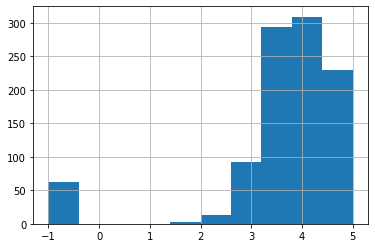

In [73]:
df.Rating.hist()

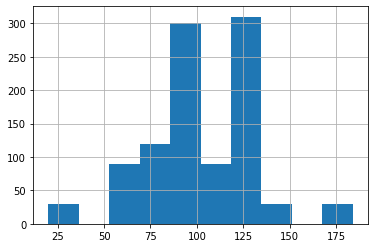

In [74]:
df.avg_salary.hist()

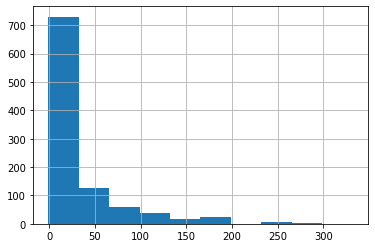

In [75]:
df.age.hist()

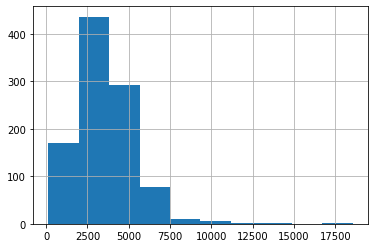

In [76]:
df.desc_len.hist()

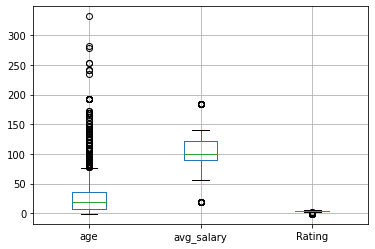

In [77]:
df.boxplot(column = ['age','avg_salary','Rating'])

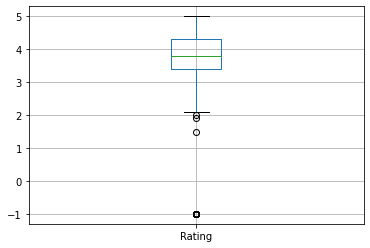

In [78]:
df.boxplot(column = ['Rating'])

In [79]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.032692,0.088425,0.327989
avg_salary,0.032692,1.000000,-0.037977,-0.018130
Rating,0.088425,-0.037977,1.000000,0.094440
desc_len,0.327989,-0.018130,0.094440,1.000000


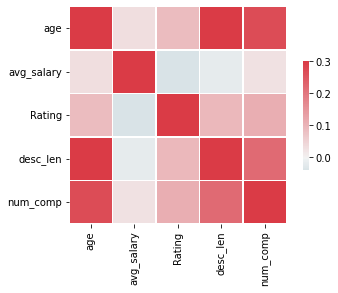

In [80]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

In [82]:
df_cat

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_txt,job_state,same_state,python_yn,r_studio,spark,aws,excel,job_simp,seniority
0,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,New York,1,1,0,0,0,1,data scientist,na
1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),ManTech,Chantilly,0,0,0,0,0,0,data scientist,na
2,"Cambridge, MA","OSAKA, Japan",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),Takeda,Cambridge,0,1,0,1,0,0,data scientist,na
3,"Overland Park, KS","New York, NY",501 to 1000 employees,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,A Place for Mom,Overland Park,0,1,0,0,1,1,data scientist,na
4,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,Government,Government Agencies,Government,Unknown / Non-Applicable,GovTech,San Francisco,0,1,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Seattle, WA","Seattle, WA",1 to 50 employees,Company - Private,-1,-1,Unknown / Non-Applicable,Shelf Engine,Seattle,1,1,0,0,0,1,data scientist,na
996,"Dallas, TX","San Francisco, CA",10000+ employees,Company - Public,Banks & Building Societies,Finance,₹500+ billion (INR),Wells Fargo,Dallas,0,0,0,0,0,1,na,na
997,"Washington, DC","Washington, DC",5001 to 10000 employees,Company - Public,Investment Banking & Asset Management,Finance,₹500+ billion (INR),Fannie Mae,Washington,1,1,0,0,0,1,data scientist,na
998,"Chicago, IL","Chicago, IL",51 to 200 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,XSELL Technologies,Chicago,1,1,0,0,0,0,data scientist,na


graph for Location: total = 295


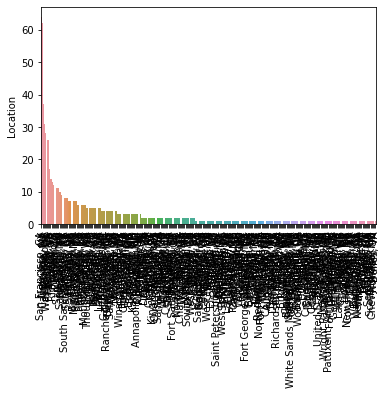

graph for Headquarters: total = 315


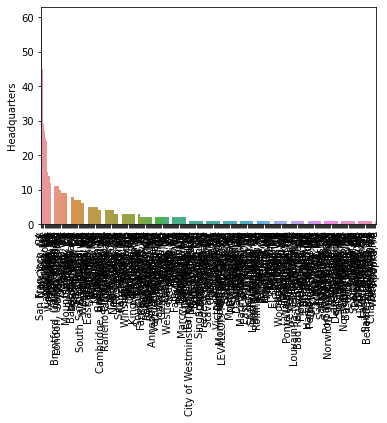

graph for Size: total = 9


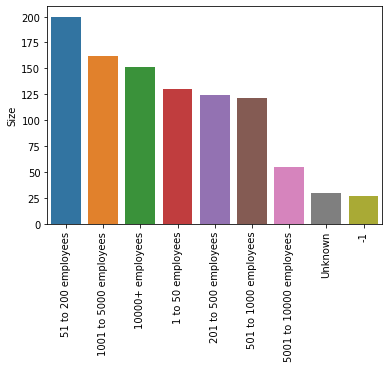

graph for Type of ownership: total = 12


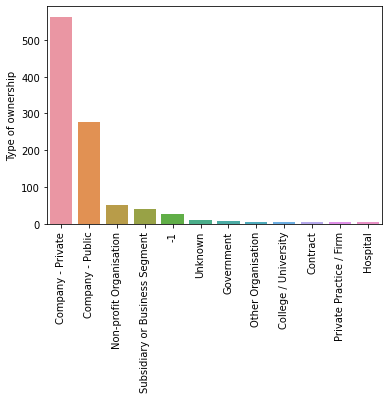

graph for Industry: total = 73


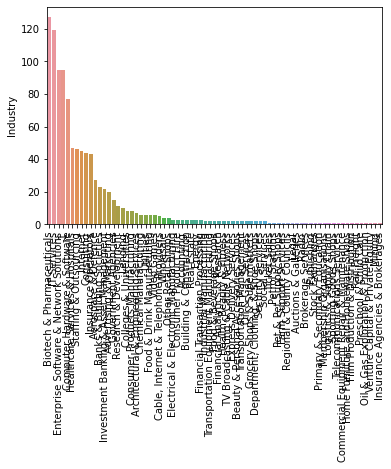

graph for Sector: total = 24


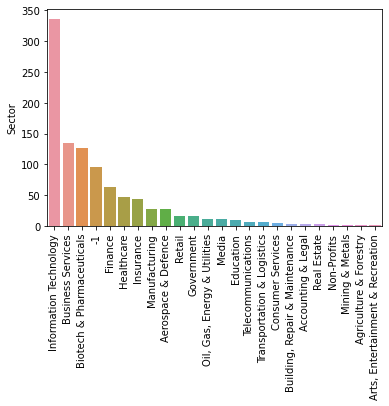

graph for Revenue: total = 13


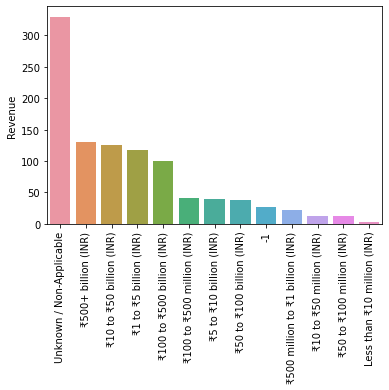

graph for company_txt: total = 723


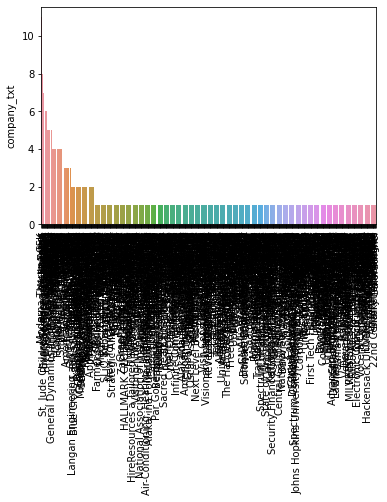

graph for job_state: total = 291


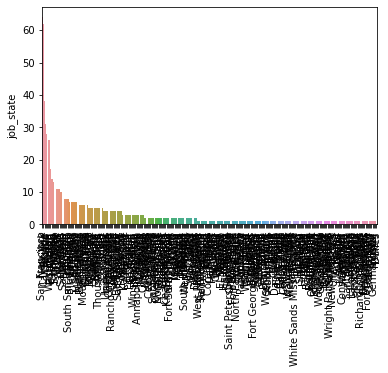

graph for same_state: total = 2


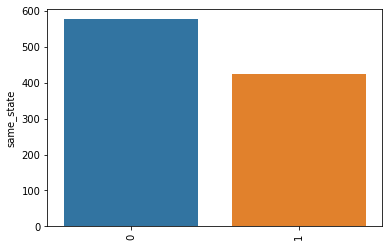

graph for python_yn: total = 2


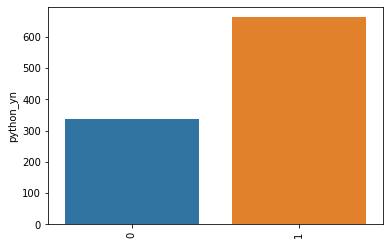

graph for r_studio: total = 2


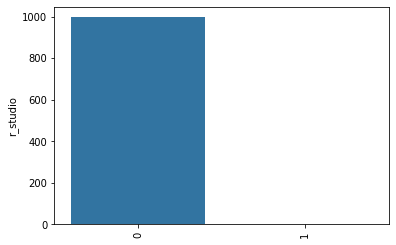

graph for spark: total = 2


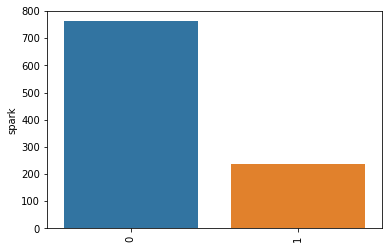

graph for aws: total = 2


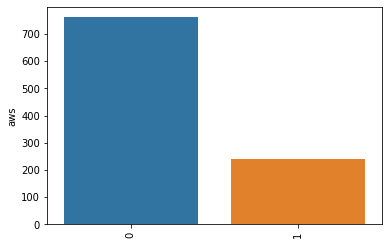

graph for excel: total = 2


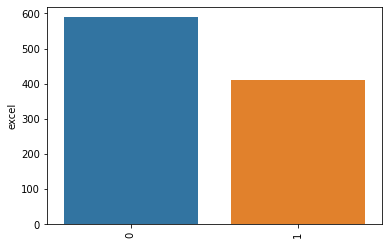

graph for job_simp: total = 7


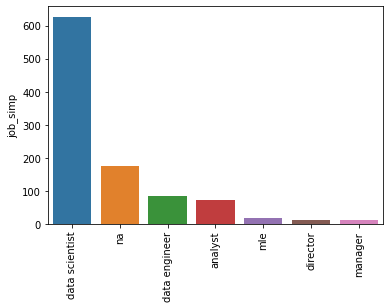

graph for seniority: total = 3


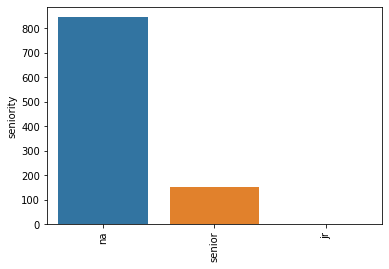

In [83]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    # sns.set(rc = {'figure.figsize':(10,5)})
    plt.show()

graph for Location: total = 20


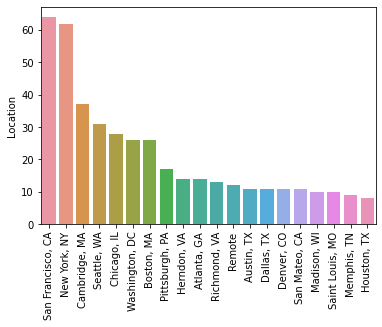

graph for Headquarters: total = 20


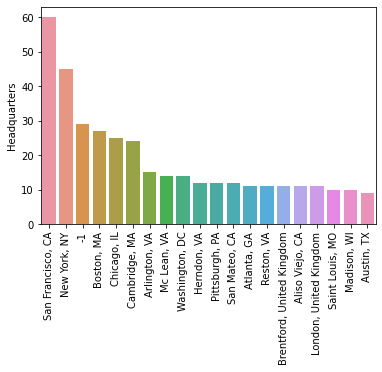

graph for company_txt: total = 20


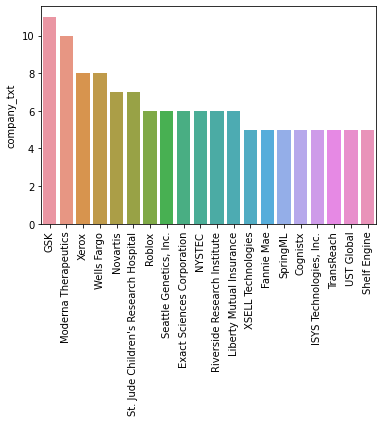

In [84]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [85]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,99.376712
data engineer,98.823529
data scientist,103.628389
director,97.083333
manager,99.375000
mle,110.906250
na,97.477143


In [86]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr         109.000000
               na          99.267857
               senior      99.156250
data engineer  na         100.383333
               senior      95.080000
data scientist na         103.901739
               senior     100.605769
director       na         102.100000
               senior      72.000000
manager        na          96.888889
               senior     106.833333
mle            na         104.136364
               senior     125.800000
na             na         100.261905
               senior      90.316327

In [87]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state            job_simp                  
Wright Patterson AFB na                    57.0
Worcester            na                    99.5
                     data scientist        93.5
Woonsocket           data scientist        80.0
Woodland Hills       data scientist       130.0
...                                         ...
Albany               analyst              184.0
Akron                data scientist        93.5
                     analyst              124.5
                     na                   154.0
Adelphi              data scientist       110.5

[428 rows x 1 columns]

In [88]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [89]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salary
job_state                 job_simp                  
Wright Patterson AFB      na                       1
Worcester                 na                       1
                          data scientist           1
Woonsocket                data scientist           1
Woodland Hills            data scientist           1
Woodbridge                data scientist           2
Winters                   data scientist           1
Winston-Salem             na                       2
                          manager                  1
Windsor                   na                       1
Wilmington                data scientist           1
Wichita                   analyst                  1
Whittier                  data scientist           1
White Sands Missile Range data scientist           1
Westminster               na                       1
                          analyst                  1
Westlake                  data engineer            1
West Palm Beach           data scientist           1
West New York             data scientist           1
Wellesley                 data scientist           1
Watertown                 na                       1
Washington                data scientist          21
                          data engineer            2
                          analyst                  3
Waltham                   director                 1
                          data scientist           1
                          na                       3
Walnut Creek              data scientist           1
Virginia                  data scientist           2
                          data engineer            1
Vienna                    data scientist           1
Vicksburg                 na                       2
Vancouver                 analyst                  1
Valencia                  na                       1
Vail                      na                       1
United States             data engineer            1
                          data scientist           3
Tysons                    data scientist           2
Twin Falls                na                       1
Tulsa                     na                       1
                          analyst                  1
Thousand Oaks             data scientist           5
Tempe                     data scientist           1
Tacoma                    analyst                  1
Sunnyvale                 data scientist           5
Sterling                  data scientist           1
Stamford                  data scientist           2
Springfield               data scientist           3
                          data engineer            1
                          mle                      1
Spartanburg               analyst                  1
Southfield                data scientist           1
South San Francisco       na                       5
                          mle                      1
                          manager                  1
                          director                 1
South Plainfield          na                       2
Somerville                data scientist           1
Smithfield                director                 1
Simi Valley               mle                      2
Sheboygan                 data scientist           1
Seattle                   data engineer            4
                          na                       7
                          data scientist          20
Scotts Valley             manager                  1
Schaumburg                data scientist           1
Santa Monica              data scientist           1
Santa Clara               data scientist           6
                          data engineer            1
                          analyst                  1
Santa Barbara             data scientist           2
Santa Ana                 data scientist           1
Sandy                     data scientist           1
Sandpoint                 data scientist           1
San Ramon     

In [90]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
Richland,184.000000
Bothell,184.000000
New Hyde Park,140.500000
Bedford,140.500000
Conshohocken,140.500000
Sandy,140.500000
Andover,140.500000
College Park,140.500000
Livermore,140.500000


In [91]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provider', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [92]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer provider', 'python_yn', 'r_studio', 'spark', 'aws', 'excel', 'Type of ownership']]
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df[df.job_simp == 'data scientist'],index =i, values='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 3.0    114.428571
 4.7    113.500000
 4.9    111.343750
 2.3    110.500000
 4.3    108.960000
 3.4    108.716667
 2.8    108.500000
-1.0    108.381356
 4.2    107.454545
 3.6    107.156250
 3.8    105.971429
 4.0    105.500000
 4.4    104.555556
 4.6    104.026316
 3.7    103.944444
 3.9    102.837500
 5.0    102.585106
 2.9    102.250000
 3.5    100.844828
 2.1    100.500000
 3.3    100.145161
 2.7     98.200000
 3.2     95.791667
 4.5     95.522727
 4.1     95.030303
 2.6     94.000000
 1.9     91.000000
 2.2     87.000000
 4.8     86.650000
 3.1     83.307692
 2.5     56.500000
Industry
                                         avg_salary
Industry                                           
Home Furniture and Houseware Shops       140.500000
Venture Capital & Private Equity         127.500000
Energy                                   120.500000
Consumer Products Manufacturing          119.000000
Grocery Shops & Supermarkets             119.

In [93]:
pd.pivot_table(df, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
-1,8,19
Less than ₹10 million (INR),1,2
Unknown / Non-Applicable,84,246
₹1 to ₹5 billion (INR),38,80
₹10 to ₹50 billion (INR),58,68
₹10 to ₹50 million (INR),2,11
₹100 to ₹500 billion (INR),39,61
₹100 to ₹500 million (INR),19,22
₹5 to ₹10 billion (INR),13,27


In [94]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [95]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

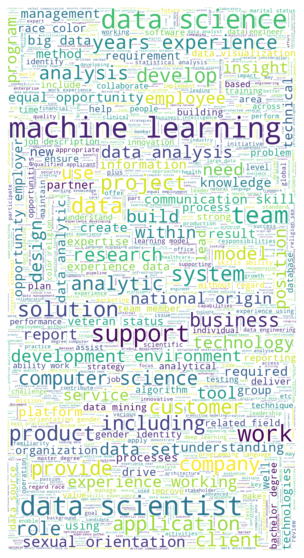

In [96]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

# building model

In [97]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer provider',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [98]:
df_dum = pd.get_dummies(df_model)

In [99]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer provider,same_state,age,python_yn,spark,aws,excel,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Non-profit Organisation,Type of ownership_Other Organisation,Type of ownership_Private Practice / Firm,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defence,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Building Societies,...,job_state_Twin Falls,job_state_Tysons,job_state_United States,job_state_Vail,job_state_Valencia,job_state_Vancouver,job_state_Vicksburg,job_state_Vienna,job_state_Virginia,job_state_Walnut Creek,job_state_Waltham,job_state_Washington,job_state_Watertown,job_state_Wellesley,job_state_West New York,job_state_West Palm Beach,job_state_Westlake,job_state_Westminster,job_state_White Sands Missile Range,job_state_Whittier,job_state_Wichita,job_state_Wilmington,job_state_Windsor,job_state_Winston-Salem,job_state_Winters,job_state_Woodbridge,job_state_Woodland Hills,job_state_Woonsocket,job_state_Worcester,job_state_Wright Patterson AFB,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,84.5,2.9,3,0,0,1,24,1,0,0,1,2728,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,84.5,4.1,0,0,0,0,54,0,0,0,0,3490,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,84.5,3.7,3,0,0,0,241,1,1,0,0,3915,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,84.5,3.0,3,0,0,0,22,1,0,1,1,5230,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,84.5,3.7,0,0,0,0,6,1,0,0,1,2905,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [100]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense,BatchNormalization,Dropout,LeakyReLU
from keras.regularizers import l2

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [101]:
import numpy as np

In [102]:
df_dum.iloc[:,1:].head()

,Rating,num_comp,hourly,employer provider,same_state,age,python_yn,spark,aws,excel,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Non-profit Organisation,Type of ownership_Other Organisation,Type of ownership_Private Practice / Firm,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defence,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Building Societies,Industry_Beauty & Personal Accessories Shops,...,job_state_Twin Falls,job_state_Tysons,job_state_United States,job_state_Vail,job_state_Valencia,job_state_Vancouver,job_state_Vicksburg,job_state_Vienna,job_state_Virginia,job_state_Walnut Creek,job_state_Waltham,job_state_Washington,job_state_Watertown,job_state_Wellesley,job_state_West New York,job_state_West Palm Beach,job_state_Westlake,job_state_Westminster,job_state_White Sands Missile Range,job_state_Whittier,job_state_Wichita,job_state_Wilmington,job_state_Windsor,job_state_Winston-Salem,job_state_Winters,job_state_Woodbridge,job_state_Woodland Hills,job_state_Woonsocket,job_state_Worcester,job_state_Wright Patterson AFB,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,2.9,3,0,0,1,24,1,0,0,1,2728,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,4.1,0,0,0,0,54,0,0,0,0,3490,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3.7,3,0,0,0,241,1,1,0,0,3915,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3.0,3,0,0,0,22,1,0,1,1,5230,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,3.7,0,0,0,0,6,1,0,0,1,2905,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [104]:
x = np.array(df_dum.iloc[:,1:])
x.shape

(1000, 443)

In [105]:
from sklearn.decomposition import PCA
pca_obj = PCA(n_components=50)
reduced_X_data = pca_obj.fit_transform(x)

In [106]:
x_dash = (x - x.mean())/x.std()

In [107]:
y = np.array(df_dum['avg_salary']).reshape(df_dum['avg_salary'].shape[0],1)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train_cv, X_test, Y_train_cv, Y_test = train_test_split(reduced_X_data, y, test_size=0.15, random_state=42)

In [110]:
X_train, X_CV, Y_train, Y_CV = train_test_split(X_train_cv, Y_train_cv, test_size=0.10, random_state=42)

In [145]:
def reg_network():
    
  network = Sequential()

  network.add(InputLayer(input_shape=(X_train.shape[1],)))

  network.add(Dense(20,kernel_initializer='glorot_normal',activation='relu'))
  network.add(Dense(20,kernel_initializer='glorot_normal',activation='relu'))
  # network.add(Dense(10,kernel_initializer='glorot_normal',activation='relu'))
  # network.add(Dense(10,kernel_initializer='glorot_normal',activation='relu'))
  network.add(Dense(20,kernel_initializer='glorot_normal',activation='relu'))
  network.add(Dense(20,kernel_initializer='glorot_normal',activation='relu'))

  # network.add(Dense(15,kernel_initializer='glorot_normal',activation='relu'))
  # network.add(Dense(15,kernel_initializer='glorot_normal',activation='relu'))
    # network.add(Dense(units=30,kernel_initializer='glorot_normal',activation='relu',kernel_regularizer='l2'))
    # network.add(BatchNormalization())
    
    # network.add(Dense(units=20,kernel_initializer='glorot_normal',activation='relu',kernel_regularizer='l2'))
    # # network.add(BatchNormalization())

    # network.add(Dense(units=10,kernel_initializer='glorot_normal',activation='relu',kernel_regularizer='l2'))
    # # network.add(BatchNormalization())

    
  network.add(Dense(units=1,kernel_initializer='glorot_normal',kernel_regularizer='l2'))
    
  return network

In [146]:
Network = reg_network()

In [147]:
Network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                1020      
                                                                 
 dense_23 (Dense)            (None, 20)                420       
                                                                 
 dense_24 (Dense)            (None, 20)                420       
                                                                 
 dense_25 (Dense)            (None, 20)                420       
                                                                 
 dense_26 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


In [148]:
Network.compile(optimizer='adam',loss='mse')

In [149]:
performance_history = Network.fit(X_train,Y_train,batch_size=35,epochs=40,verbose=1,validation_data=(X_CV,Y_CV))

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 6397.5547 - val_loss: 4250.4189
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 5311.1504 - val_loss: 4194.1538
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 4968.9956 - val_loss: 4166.2153
Epoch 4/40
22/22 [==============================] - 0s 3ms/step - loss: 4941.4937 - val_loss: 4012.1184
Epoch 5/40
22/22 [==============================] - 0s 4ms/step - loss: 4998.4507 - val_loss: 3979.1155
Epoch 6/40
22/22 [==============================] - 0s 5ms/step - loss: 4866.3955 - val_loss: 3956.5269
Epoch 7/40
22/22 [==============================] - 0s 3ms/step - loss: 4804.3306 - val_loss: 4084.9907
Epoch 8/40
22/22 [==============================] - 0s 4ms/step - loss: 4744.1250 - val_loss: 3979.7505
Epoch 9/40
22/22 [==============================] - 0s 3ms/step - loss: 4767.3438 - val_loss: 3832.0110
Epoch 10/40
22/22 [==============================] - 0s 4ms/ste

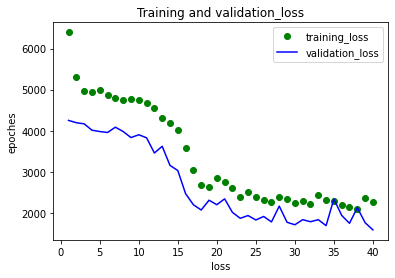

In [150]:
training_loss = performance_history.history['loss']

validation_loss = performance_history.history['val_loss']

epoches = range(1,len(training_loss)+1)

import matplotlib.pyplot as plt

plt.plot(epoches,training_loss,'go',label='training_loss')
plt.plot(epoches,validation_loss,'b',label='validation_loss')
plt.title('Training and validation_loss')
plt.xlabel('loss')
plt.ylabel('epoches')
plt.legend()
plt.show()

In [151]:
y_pred = Network.predict(np.array(X_test), verbose=1)

5/5 [==============================] - 0s 2ms/step


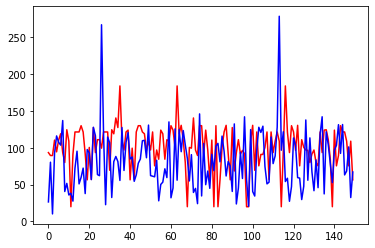

In [152]:
plt.plot(Y_test,c='r')
plt.plot(y_pred,c='b')
plt.show()